# Draft 2 Two economies in connect and Trade at Price

In [1]:
import random
import math
from numpy.core.shape_base import atleast_2d
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch



In [2]:
# Import functions in the function file

%run trade_functions.ipynb


## define encounter matrix

In [3]:
economy_size=100

In [4]:
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)


## Define Economy A

In [5]:
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size)]
agent_a['parameter']=[[3,3,3] for _ in range(economy_size)]
agent_a['money']=[150 for _ in range(economy_size)]
agent_a['gooda']=[150 for _ in range(economy_size)]
agent_a['goodb']=[150 for _ in range(economy_size)]


# Define Economy B

In [6]:
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size)]
agent_b['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_b['money']=[200 for _ in range(economy_size)]
agent_b['gooda']=[200 for _ in range(economy_size)]
agent_b['goodb']=[200 for _ in range(economy_size)]



#Defne  inhomogeneous economy

In [7]:
def utility_func_cd(ga,gb,m,parameter):
  a=m**(parameter[0]-1)

  b=ga**(parameter[1]-1)

  c=gb**(parameter[2]-1)

  utility=a*b*c
  utility=float(utility)
  return utility

## trade function

In [8]:
import random

def encounter1(matrix):
    # Pick a random row
    row = random.choice(range(len(matrix)))

    # Pick a random column different from the row
    possible_cols = [i for i in range(len(matrix[0])) if i != row]
    col = random.choice(possible_cols)

    return row, col





# metropolis

In [9]:


def inter_tradecd1(agent1,agent2,length,size,t,f1,f2):
  
  mla=agent1['money'].copy()
  gala=agent1['gooda'].copy()
  gbla=agent1['goodb'].copy()
  parametera=agent1['parameter'].copy()
  mlb=agent2['money'].copy()
  galb=agent2['gooda'].copy()
  gblb=agent2['goodb'].copy()
  parameterb=agent2['parameter'].copy()
  sum_etaa = sum(sublist[2] for sublist in parametera)
  sum_etab= sum(sublist[2] for sublist in parameterb)
  
  Ta_history=[]
  Tb_history=[]
  
  for i in range(length[0]):
    
    gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f2)

    
    galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f1,f2)
 
    Ta_history.append(sum(mla)/sum_etaa)
    Tb_history.append(sum(mlb)/sum_etab)
  for j in range(length[1]):
    
    gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f2)

    
    galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f1,f2)

    
    gala,gbla,mla,galb,gblb,mlb=inter_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,t,f1,f2)
 
      
    Ta_history.append(sum(mla)/sum_etaa)
    Tb_history.append(sum(mlb)/sum_etab)

  return Ta_history,Tb_history








In [26]:
Ta,Tb=inter_tradecd1(agent_a,agent_b,[1000,2000],1,[0,0,1],utility_func_cd,utility_func_cd)

# Temperature for two connected economy(Fig5a,Fig5b)

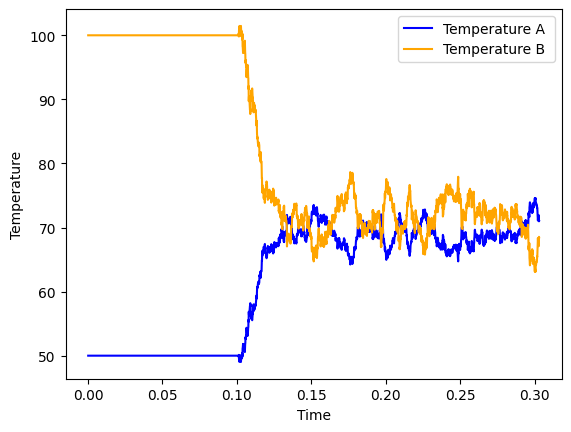

In [27]:




# Create a range of indices for the x-axis


len_list=len(Ta)+1
numbers = list(range(1, len_list))
  
time_scale=economy_size**2-economy_size
time_index = [num / time_scale for num in numbers]
# Plot both lists on the same graph
plt.plot(time_index, Ta, label='Temperature A ', color='blue')
plt.plot(time_index, Tb, label='Temperature B', color='orange')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()

# Test STD

In [41]:
Ta,Tb=inter_tradecd1(agent_a,agent_b,[1000,502000],1,[0,0,1],utility_func_cd,utility_func_cd)

In [42]:
print(np.std(Tb[-500000:]))

3.822109092773802


In [10]:
# Take 10% of the change
Ta,Tb=inter_tradecd1(agent_a,agent_b,[10000,5020000],0.1,[0,0,1],utility_func_cd,utility_func_cd)

In [11]:
print(np.std(Tb[-500000:]))

1.154593400352782


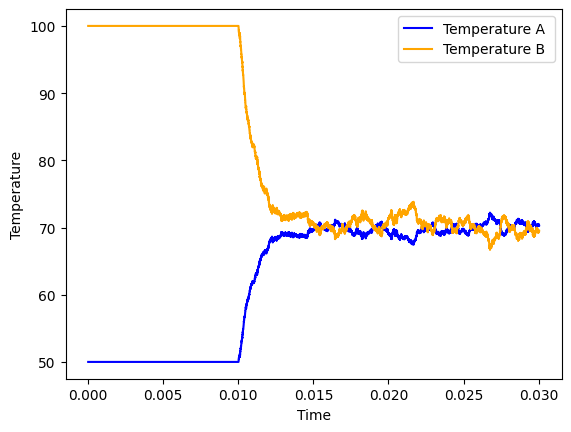

In [14]:




# Create a range of indices for the x-axis


len_list=len(Ta)+1
numbers = list(range(1, len_list))
  
time_scale=(10*economy_size)**2-(10*economy_size)
time_index = [num / time_scale for num in numbers]
# Plot both lists on the same graph
plt.plot(time_index, Ta, label='Temperature A ', color='blue')
plt.plot(time_index, Tb, label='Temperature B', color='orange')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

# Show the plot
plt.show()

# Price(Fig6)


In [25]:
economy_size=10000

In [26]:
agent_c = create_agent()
agent_c['id_list'] = [i for i in range(economy_size)]
agent_c['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_c['money']=[50 for _ in range(economy_size)]
agent_c['gooda']=[50 for _ in range(economy_size)]
agent_c['goodb']=[50 for _ in range(economy_size)]


In [27]:

def price_tradecd1(agent,length1,length2,size,t,f1,f2,miu):
  
  mla=agent['money'].copy()
  gala=agent['gooda'].copy()
  gbla=agent['goodb'].copy()
  parametera=agent['parameter'].copy()
  
  
  money_history=[]
  gooda_history=[]
  goodb_history=[]
  for i in range(length1):
    
    gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f2)

   
    
    
    
    money_history.append(sum(mla))
    gooda_history.append(sum(gala))
    goodb_history.append(sum(gbla))
      
  for i in range(length2):
    
    gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f2)
  
    gala,gbla,mla=trade_atprice(gala,gbla,mla,parametera,economy_size,size,t,f1,miu)
    

    
    
    
    money_history.append(sum(mla))
    gooda_history.append(sum(gala))
    goodb_history.append(sum(gbla))

  return np.mean(gooda_history[-10000]),np.mean(goodb_history[-10000]),np.mean(money_history[-10000]),gooda_history,goodb_history,money_history

In [28]:


miu_values = [0.9, 0.95, 1.0, 1.05, 1.1]
#miu_values=[0.9]
# Initialize a list to store time-averaged Gk values for each miu
MeanG_lists = []
Good_history=[]
j=0

for miu in miu_values:
    mga,mgb,mm,gal,gbl,ml=price_tradecd1(agent_c,50000,200000,1,[1,0],utility_func_cd,utility_func_cd,miu)
    MeanG_lists.append(int(mga))
    Good_history.append(gal)


In [29]:
def g_calculate(price,g):
    x=0.5*g*(price+1)/(price)
    return(x)
    

In [30]:
p=0.9
g_list=[]
for i in range(5):
    g_list.append(int(g_calculate(p,sum(agent_c['money']))))
    p=p+0.05
print(g_list)

[527777, 513157, 500000, 488095, 477272]


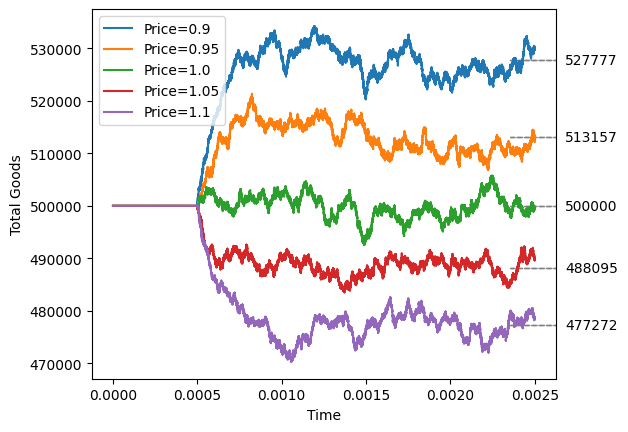

In [31]:

len_list=len(Good_history[0])+1
numbers = list(range(1, len_list))
  
time_scale=economy_size**2-economy_size
time_index = [num / time_scale for num in numbers]
# Your existing x values and plot code

for i, G in enumerate(Good_history):
    plt.plot(time_index, G, label=f'Price={miu_values[i]}')

# Define the horizontal lines

line_y_values = g_list
right_limit = plt.gca().get_xlim()[1]  # Right edge of the plot
line_length = 0.1 * (plt.gca().get_xlim()[1] - plt.gca().get_xlim()[0])  # 20% of the plot width

# Add horizontal lines and labels outside the graph
for y_val in line_y_values:


    line = FancyBboxPatch((right_limit - line_length, y_val), line_length, 0,
                                boxstyle="Square,pad=0", linestyle="--", color="gray")
    plt.gca().add_patch(line)
    # plt.text(right_limit, y_val, str(y_val), va='center', ha='right')
    plt.text(1.02, y_val, str(y_val), va='center', ha='left', transform=plt.gca().get_yaxis_transform())

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Total Goods')
plt.legend(loc='upper left')

# Adjust the right margin to ensure labels are not cut off
plt.subplots_adjust(right=0.85)

# Show the plot
plt.show()